In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import data
hotel_df = pd.read_csv('Resources/Hotel reservations.csv')
hotel_df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [3]:
# Check Data Types
hotel_df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [4]:
# Checking for NaN values
hotel_df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
hotel_df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
hotel_df.shape

(36275, 19)

In [7]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
# Checking data columns.
hotel_df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [9]:
# Checking for duplicate entries.
print (f"Duplicate entries: {hotel_df.duplicated().sum()}")

Duplicate entries: 0


In [10]:
# Drop Type of Meal Plan column.
hotel_df.drop(columns=["type_of_meal_plan"],inplace = True)
hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [11]:
# Get summary statistics.
hotel_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [12]:
# Combining the Weekend nights and week night booking colums to create a total nights column.
hotel_df["total_nights"]=hotel_df["no_of_weekend_nights"]+hotel_df["no_of_week_nights"]

In [13]:
hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,INN00001,2,0,1,2,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,INN00002,2,0,2,3,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,INN00003,1,0,2,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,INN00004,2,0,0,2,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


In [14]:
# Exporting the csv
# file=("clean_hotel_dataset.csv")
# hotel_df.to_csv(file)

# EXPLANATORY ANALYSIS
•What’s the average room price per month?
•What is the busiest month?
•What's the average daily rate?
•Do longer total stays have lower average prices?
•From which segment do reservations come the most?
•Which time of the year has the longest reservations?
•Which months have more reservations with children?
•Which months include more reservations with weekends?
•Can you predict if the customer is going to make a reservation online?

In [15]:
# •What’s the average room price per month?
monthly_room_price = hotel_df[["arrival_month","avg_price_per_room","arrival_year"]].sort_values("arrival_month")
monthly_room_price

,arrival_month,avg_price_per_room,arrival_year
10987,1,96.00,2018
14608,1,82.00,2018
28442,1,90.00,2018
6754,1,71.00,2018
23530,1,52.00,2018
...,...,...,...
22512,12,78.20,2018
22503,12,74.80,2018
22492,12,86.40,2018
22614,12,104.00,2018


Text(0.5, 1.0, 'Average Price per Month')

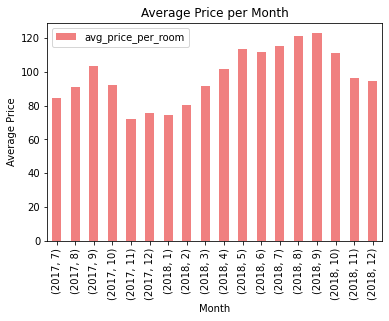

In [16]:
# Finding average price per month starting July 2017 to Dec 2018
avg_room_price = hotel_df.groupby(['arrival_year', 'arrival_month']).mean()
avg_room_price.loc[:, ['avg_price_per_room']].plot.bar(color = "lightcoral")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Average Price per Month")

In [17]:
# What's the average daily rate?
hotel_df["avg_price_per_room"].mean()

103.4235390764958

In [18]:
# Do longer total stays have lower average prices?
# correlation between total_nights and avg_price_per_room.
hotel_df['avg_price_per_room'].corr(hotel_df['total_nights'])

0.015768370115224053

In [32]:
# What is the busiest month?
month = hotel_df.groupby(["arrival_year", "arrival_month"]).count()["total_nights"]
month

arrival_year  arrival_month
2017          7                 363
              8                1014
              9                1649
              10               1913
              11                647
              12                928
2018          1                1014
              2                1704
              3                2358
              4                2736
              5                2598
              6                3203
              7                2557
              8                2799
              9                2962
              10               3404
              11               2333
              12               2093
Name: total_nights, dtype: int64

Text(0.5, 1.0, 'Busiest Month')

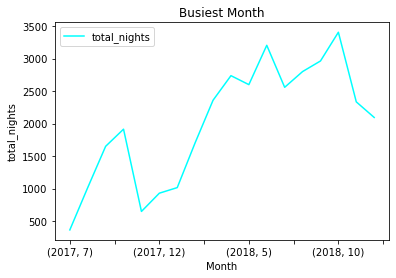

In [36]:
month = hotel_df.groupby(['arrival_year', 'arrival_month']).count()
month.loc[:, ['total_nights']].plot(color = "aqua")
plt.xlabel("Month")
plt.ylabel("total_nights")
plt.title("Busiest Month")

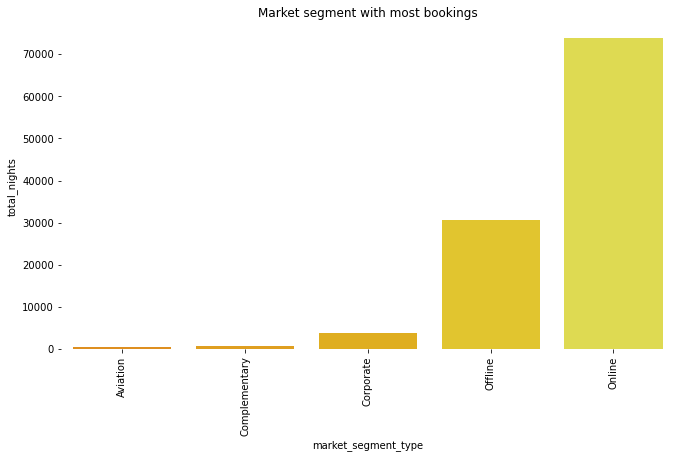

In [21]:
# From which segment do reservations come the most?
market_segment = hotel_df.pivot_table(index = ['market_segment_type'],
                                      values = ['total_nights'], 
                                      aggfunc = "sum").reset_index()
new = sns.barplot(x="market_segment_type",
                 y = "total_nights",
                 data = market_segment,
                 palette = "Wistia_r")
plt.xticks(rotation=90)
plt.title("Market segment with most bookings")
plt.ylabel("total_nights")
plt.xlabel("market_segment_type")
sns.despine(bottom = True, left = True)
fig = plt.gcf()
fig.set_size_inches(11,6)
plt.show()

Text(0.5, 1.0, 'Longest Reservations per Month')

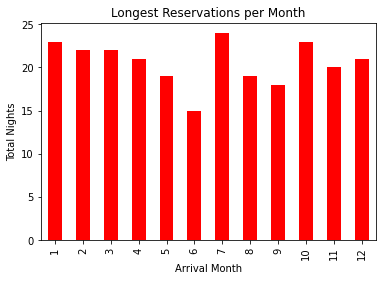

In [22]:
# Which time of the year has the longest reservations? July
longest_reservation = hotel_df.groupby(["arrival_year","arrival_month"]).max()
longest_reservation.loc[2018,:]["total_nights"].plot.bar(color="red")
plt.xlabel("Arrival Month")
plt.ylabel("Total Nights")
plt.title("Longest Reservations per Month")



In [23]:
longest_reservation.head(25)

Booking_ID  no_of_adults  no_of_children  \
arrival_year arrival_month                                            
2017         7               INN36087             3               2   
             8               INN36223             3               9   
             9               INN36260             3               2   
             10              INN36216             3               9   
             11              INN36230             3               2   
             12              INN36251             3               3   
2018         1               INN36252             3              10   
             2               INN36264             3               3   
             3               INN36267             3               3   
             4               INN36274             4               3   
             5               INN36266             4               2   
             6               INN36245             3               3   
             7               INN36273             4               3   
             8               INN36271             4               3   
             9               INN36258             4               2   
             10              INN36272             4               2   
             11              INN36269             3               2   
             12              INN36275             4               3   

                            no_of_weekend_nights  no_of_week_nights  \
arrival_year arrival_month                                            
2017         7                                 5                 15   
             8                                 5                 12   
             9                                 4                 10   
             10                                6                 13   
             11                                3                  8   
             12                                4                 15   
2018         1                                 6                 17   
             2                                 6                 16   
             3                                 6                 16   
             4                                 6                 15   
             5                                 6                 13   
             6                                 4                 11   
             7                                 7                 17   
             8                                 6                 13   
             9                                 5                 13   
             10                                6                 17   
             11                                6                 14   
             12                                6                 15   

                            required_car_parking_space room_type_reserved  \
arrival_year arrival_month                                                  
2017         7                                       1        Room_Type 5   
             8                                       1        Room_Type 6   
             9                                       1        Room_Type 7   
             10                                      1        Room_Type 7   
             11                                      1        Room_Type 7   
             12                                      1        Room_Type 7   
2018         1                                       1        Room_Type 7   
             2                                       1        Room_Type 7   
             3                                       1        Room_Type 7   
             4                                       1        Room_Type 7   
             5                                       1        Room_Type 7   
             6                                       1        Room_Type 7   
             7                                       1        Room_Type 7   
             8                

Text(0.5, 1.0, 'Reservations with Children')

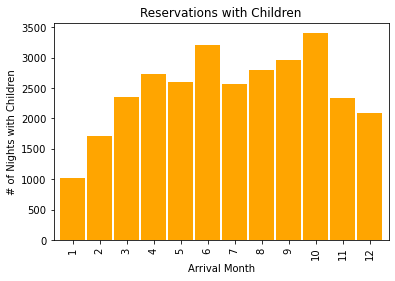

In [24]:
# Which months have more reservations with children?
children_reservation = hotel_df.groupby(["arrival_year","arrival_month"]).count()
children_reservation.loc[2018,:]["no_of_children"].plot.bar(color="orange", width=.9)
plt.xlabel("Arrival Month")
plt.ylabel("# of Nights with Children")
plt.title("Reservations with Children")

Text(0.5, 1.0, 'Reservations with Weekends')

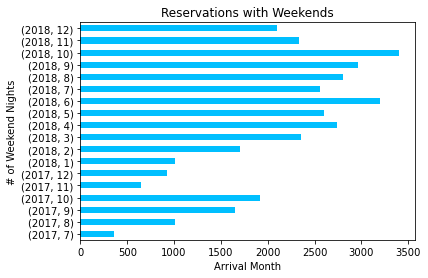

In [25]:
# Which months include more reservations with weekends?
weekend_reservation = hotel_df.groupby(["arrival_year","arrival_month"]).count()
weekend_reservation["no_of_weekend_nights"].plot.barh(color = "deepskyblue")
plt.xlabel("Arrival Month")
plt.ylabel("# of Weekend Nights")
plt.title("Reservations with Weekends")

In [26]:
# Lead time vs cancellations
cancellations = hotel_df.copy()
cancellations["booking_status_encoded"] = LabelEncoder().fit_transform(cancellations["booking_status"])
cancellations.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,booking_status_encoded
0,INN00001,2,0,1,2,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3,1
1,INN00002,2,0,2,3,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5,1
2,INN00003,1,0,2,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3,0
3,INN00004,2,0,0,2,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2,0
4,INN00005,2,0,1,1,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2,0


In [27]:
cancellations["booking_status_encoded"].value_counts()

1    24390
0    11885
Name: booking_status_encoded, dtype: int64

Text(0.5, 1.0, 'Lead time vs Cancellations')

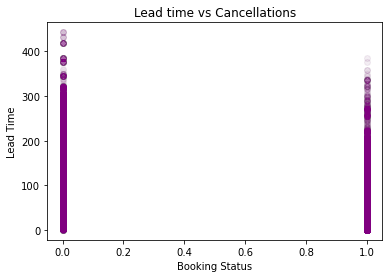

In [28]:
plt.scatter(cancellations["booking_status_encoded"],cancellations["lead_time"], alpha = 0.01, color ="purple")
plt.xlabel("Booking Status")
plt.ylabel("Lead Time")
plt.title("Lead time vs Cancellations")

In [29]:
# correlation between Lead time and cancellations - There is a negative correlation
cancellations["booking_status_encoded"].corr(cancellations["lead_time"])

-0.4385379185883181